# Mi primer EDA

## 1. Bloque de código para las bibliotecas que vamos a ir neceistando

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point

# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## 2. Almacenamos la base de datos con la que vamos a trabajar y comprobamos que es correcta.

In [2]:
# Paso 1: Crear carpeta para almacenar datos en crudo
os.makedirs('./data/raw', exist_ok=True)

# Paso 2: Descargar y almacenar el archivo
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
file_path = './data/raw/AB_NYC_2019.csv'
df = pd.read_csv(url)

# Guardar una copia local en la carpeta indicada
df.to_csv(file_path, index=False)

# Paso 3: Cargar el conjunto de datos
# Verificamos las primeras filas para inspeccionar la estructura y composición del conjunto de datos
df = pd.read_csv(file_path)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 3. Conociendo el Data Set 

In [3]:
# Obtener las dimensiones
print("Filas , Columnas")
df.shape

Filas , Columnas


(48895, 16)

Obtenemos información sobre los tipos de datos y valores no nulos para más tarde  
 poder clasificarlos, modificarlos o anularnos en caso de no ser necesarios.

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 4. Trabajando los duplicados.

Usamos el método duplicated() para detectar duplicados en un DataFrame y
sum() para contar el número de duplicados.

In [5]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"En este caso en contramos {num_duplicados} duplicados.")


En este caso en contramos 0 duplicados.


En caso de que haya duplicados los seleccionamos, eliminamos o modificamos a un valor que concuerde con la info del Data

In [6]:
#Para seleccionar duplicados:

#df_duplicados = df[duplicados]

#método drop_duplicates() para eliminar filas duplicadas. Se puede indicar el conjunto de atributos a considerar.

#df_sin_duplicados = df.drop_duplicates()

# ejemplo control de duplicados:

#df.duplicated().sum()
# sin considerar el id
#df.drop("Id", axis = 1).duplicated().sum()

## 5. Los Nulos

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Como podemos ver en last_reviews & en reviews_per_month hay bastantes nulos, es posible que prescindamos de estas columnas.

In [8]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

name ==> Missing Values : 16, dtypes : object
host_name ==> Missing Values : 21, dtypes : object
last_review ==> Missing Values : 10052, dtypes : object
reviews_per_month ==> Missing Values : 10052, dtypes : float64


Rellenaremos los nulos de reviews_per_month por 0 para poder trabajar esta columna en caso de que sea necesaria y comprobamos.

In [9]:
df_new = df.copy()
df_new['reviews_per_month'] = df_new['reviews_per_month'].fillna(0)

df_new.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 6 Eliminando atributos no relevantes

In [10]:
df_new = df_new.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1)
df_new.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Vamos a juntar en una sola columna la latitud y la longitud para tener las coordenadas en caso de que pueda ser util

In [11]:
# Combinar latitude y longitude en una columna 'coordinates' como tuple
df_new['coordinates'] = df_new.apply(lambda row: (row['latitude'], row['longitude']), axis=1)

# Eliminar las columnas originales si ya no son necesarias
df_new.drop(['latitude', 'longitude'], axis=1, inplace=True)

# Mostrar el resultado
df_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,coordinates
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,"(40.64749, -73.97237)"
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,"(40.75362, -73.98377)"
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365,"(40.80902, -73.9419)"
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,"(40.68514, -73.95976)"
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,"(40.79851, -73.94399)"


## 6. Variables Categóricas y numéricas - Limpiando el Data

Comprobamos de nuevo las clases de variables para poder luego seleccionarlas, dividirlas y eliminarlas en caso de no ser necesarias

In [12]:
df_new.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
coordinates                        object
dtype: object

In [13]:
# Identificar las variables numéricas
variables_numericas = df_new._get_numeric_data().columns
print("Las variables numéricas son:")
for var in variables_numericas:
    print(f" - {var}")

# Identificar las variables categóricas
variables_categoricas = set(df_new.columns) - set(variables_numericas)
print("\nLas variables categóricas son:")
for var in variables_categoricas:
    print(f" - {var}")


Las variables numéricas son:
 - price
 - minimum_nights
 - number_of_reviews
 - reviews_per_month
 - calculated_host_listings_count
 - availability_365

Las variables categóricas son:
 - neighbourhood_group
 - coordinates
 - neighbourhood
 - room_type


## 7 Análisis de las variables categóricas
Conteo

In [14]:
df_new.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [15]:
df_new.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [16]:
df_new.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [17]:
df_new.coordinates.value_counts()

coordinates
(40.71232, -73.9422)     3
(40.75584, -73.99559)    2
(40.75888, -73.99077)    2
(40.76914, -73.98757)    2
(40.74882, -73.97788)    2
                        ..
(40.69832, -73.92622)    1
(40.72554, -73.98245)    1
(40.76089, -73.99879)    1
(40.70883, -74.00764)    1
(40.72778, -73.97825)    1
Name: count, Length: 48871, dtype: int64

#### -Entender las variables numéricas

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       48895.000000   
mean     152.720687        7.029962          23.274466           1.090910   
std      240.154170       20.510550          44.550582           1.597283   
min        0.000000        1.000000           0.000000           0.000000   
25%       69.000000        1.000000           1.000000           0.040000   
50%      106.000000        3.000000           5.000000           0.370000   
75%      175.000000        5.000000          24.000000           1.580000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%             

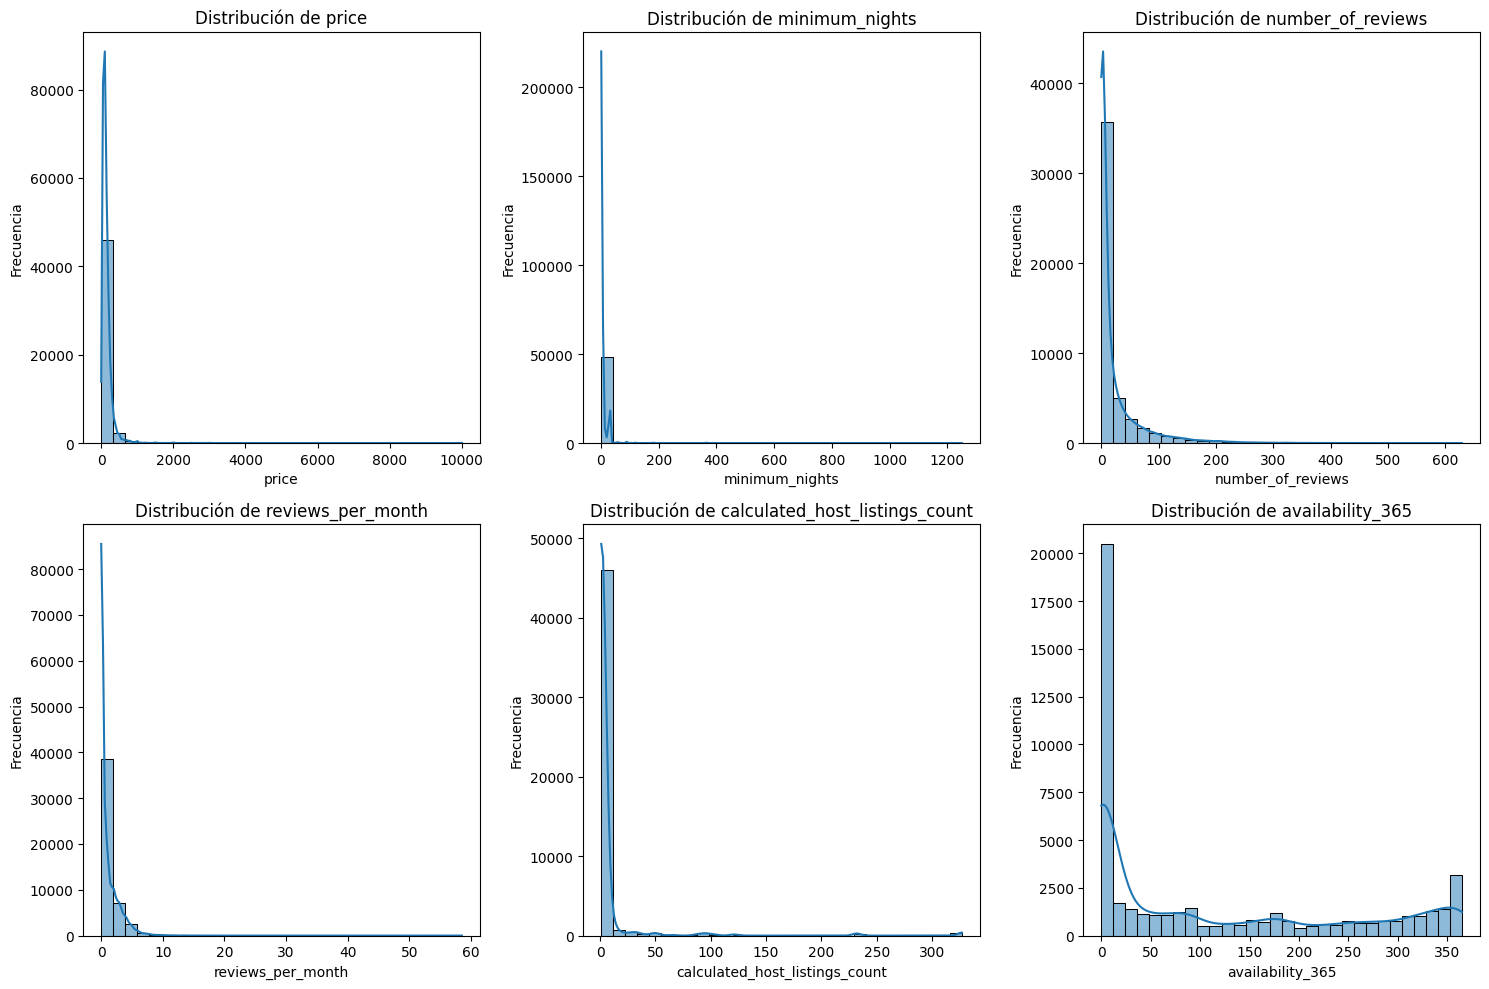

In [18]:
# Resumen estadístico general
print(df_new.describe())

# Visualizar la distribución de cada variable numérica
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar columnas numéricas
numeric_columns = df_new.select_dtypes(include='number').columns

# Configurar el layout de la cuadrícula 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas

# Crear gráficos para cada variable numérica
for col, ax in zip(numeric_columns, axes.flatten()):
    sns.histplot(data=df_new, x=col, kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()
